# functions exercises

## 1. Area (*)  
Create a function that takes the base and height of a triangle as input parameters and returns the area of the triangle.

In [1]:
def triangle_area(height, base):
    """
    Returns triangle area float

    Calculate area of triangle - 
    Using formula A = (height * base) / 2,
    where height and base are float or int
    """
    area = (height * base) / 2
    return area

triangle_area(1, 23)

11.5

improving function to include error handling:

In [2]:
def triangle_area(height, base):
    """
    Returns triangle area float

    Calculate area of triangle - 
    Using formula A = (height * base) / 2
    """

    # error handling checking for valid inputs
    try:
        height = float(height) # height input can be converted to float
        base = float(base) # base input can be converted to float

        if not height > 0 or not base > 0: # if height and base are not greater than 0:
            raise ValueError(f"height: {height}, base: {base} - invalid triangle dimensions, values must be greater than 0")

        area = (height * base) / 2 # calculate area
        return area # return area
    
    except ValueError as err: # errors occurring when try-ing float() on height and base:
        print(err)

triangle_area(1, 23) # calling function

11.5

## 2. Euclidean distance (*)  
The formula for Euclidean distance in 2D between $P: (p_1, p_2)$ and $Q: (q_1, q_2)$  is: 

$d(P,Q) = \sqrt{(p_1-q_1)^2 + (p_2-q_2)^2}$

&nbsp; a) &nbsp; Create a function that takes two points as input parameters and return the Euclidean between them. (*)

&nbsp; b) &nbsp; Let the user input two points. Call the function using the users input points. (*)

&nbsp; c) &nbsp; Use your function to calculate distances between the origin (0, 0) and each of these points: (10, 3), (-1, -9), (10, -10), (4, -2), (9, -10). (*)

In [10]:
# a) --------------------
from math import sqrt

def calculate_euclidean_distance(P, Q): # function that calculates the euclidean distance between 2 points in a 2D coordinate plane
    """
    Return float of euclidian distance between 2D points P and Q containing values for P1, P2 and Q1, Q2 respectively

    Input must contain elements convertible to datatype float
    """
    try:
        P = [float(element) for element in P] # convert elements of P to float
        Q = [float(element) for element in Q] # convert elements of Q to float

        distance = sqrt((P[0] - Q[0])**2 + (P[1] - Q[1])**2) # calculate euclidian distance using PQ formula
        
        return distance # return calculated distance

    except ValueError as err: # if ValueError when converting elements of P and Q to float:
        print(err) # print error message

# b) --------------------
while True: # looping until valid points are entered:
    user_input = input("Enter 2 points (P1,P2 Q1,Q2) to calculate the distance between them")

    try: # try user_input to see if it is valid:
        user_input_list = user_input.split() # split input into 2 list elements 0 and 1 (P, Q)

        P = user_input_list[0].split(",") # set P = element 0 of user_input (P1, P2)
        Q = user_input_list[1].split(",") # set Q = element 1 of user_input (Q1, Q2)

        P = [float(element) for element in P] # try converting elements of P (P1, P2) to float
        Q = [float(element) for element in Q] # try converting elements of Q (Q1, Q2) to float

        # if length of: user_input != 2 (does not contain 2 coordinate points P and Q), or: P or Q != 2 (does not contain x and y values)
        if len(user_input_list) != 2 or len(P) != 2 or len(Q) != 2:
            print(f"{user_input} is not valid - make sure to enter 2 points using the format P1,P2 Q1,Q2") # print error message and loop back to prompting for user input

        else: # if input is 2 valid coordinate points P and Q:
            distance = calculate_euclidean_distance(P, Q) # calculate distance between P and Q
            print(f"The distance between {P} and {Q} is {distance:.3f} distance units") # print results
            break # break the loop

    except ValueError as err: # user input values that are not able to convert into float:
        print(f"{user_input} -> {err}") # print error message and loop back to prompting for user input

    except IndexError as err: # user input too many points, or did not correctly separate using commas and spaces:
        print(f"{user_input} -> {err}, make sure to enter the right amount of points, in the format P1,P2 Q1,Q2") # print error message and loop back to prompting for user input

"one",1 4,4 -> could not convert string to float: '"one"'
1,1 4,4,4 is not valid - make sure to enter 2 points using the format P1,P2 Q1,Q2
1,1 4,4 8,8 is not valid - make sure to enter 2 points using the format P1,P2 Q1,Q2
1 1 4 4 is not valid - make sure to enter 2 points using the format P1,P2 Q1,Q2
The distance between [1.0, 1.0] and [4.0, 4.0] is 4.243 distance units


In [8]:
# c) --------------------
P = (0, 0)
Q_list = [(10, 3), (-1, -9), (10, -10), (4, -2), (9, -10)]

for Q in Q_list:
    distance = calculate_euclidean_distance(P, Q)
    print(f"The distance between {P} and {Q} is {distance:.3f} distance units")

The distance between (0, 0) and (10, 3) is 10.440 distance units
The distance between (0, 0) and (-1, -9) is 9.055 distance units
The distance between (0, 0) and (10, -10) is 14.142 distance units
The distance between (0, 0) and (4, -2) is 4.472 distance units
The distance between (0, 0) and (9, -10) is 13.454 distance units


# 3. Mathematical functions (*)

Make the following functions with **def** or **lambda** and plot their graphs in the same figure window, with $x\in [-10,10]$ :

&nbsp; a) &nbsp;  $f(x) = x^2 -3$ (*)

&nbsp; b) &nbsp; $g(x) = 4x-7$ (*)

What could the relation between $f(x)$ and $g(x)$ be?

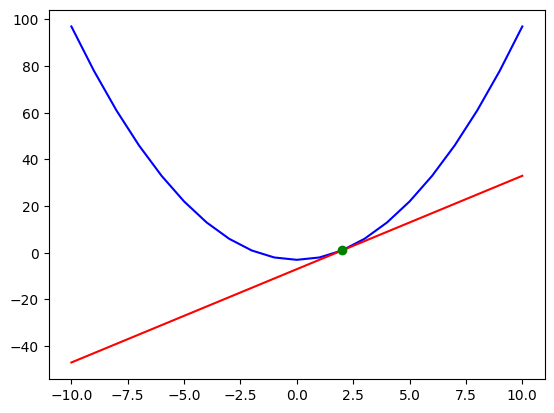

In [158]:
import matplotlib.pyplot as plt

def graph_functions(x_value_range = (0, 10), functions = ["x", "x**2"]):
    """
    takes range object of x-values and list object containing 2 functions in string format -> plots graph of functions between specified x-values and any intersecting points
    """
    function_list = [] # list to store functions of x (y-values of each input equation for x-values within the given range)
    # ----- calculate each input function within specified range of x-values -----
    for function in functions:
        function_value = [] # set function value to an empty list (done here so it resets itself between different functions)
        function_value = [eval(function.replace("x", f"({x})")) for x in x_value_range] # calculate f(x) for every x-value in the specified range by replacing "x" with (x) - parenthesis for correct eval() in all occasions
        function_list.append(function_value) # append function value list
    # ----- append list of [x, y] values to intersect points if any are found between the functions -----
    intersect_points = [[x, function_list[0][x - min(x_value_range)]] for x in x_value_range if function_list[0][x - min(x_value_range)] == function_list[1][x - min(x_value_range)]] # TODO question limitless if-statement (comparing indices of unknown amount of functions)
    # ----- plot graphs -----
    plt.plot(x_value_range, function_list[0], 'b-', x_value_range, function_list[1], 'r-') # plot both functions of function_list
    for point in range(len(intersect_points)): # for point in intersect_points (in case there are multiple intersect points)
        plt.plot(intersect_points[point][0], intersect_points[point][1], 'go-') # plot point with a green circle marker

# define functions to graph out (can be done as user input since it's string format)
F = "x**2 - 3" #TODO question find intersecting lines between two points other than comparing if point > point[-1] etc. example: -3 or -7. but not -5 or -10
G = "4 * x - 7"

# define span of x-values for plotting graph
x_lowest = -10
x_highest = 10
x_value_range = range(x_lowest, x_highest + 1) # +1 to include final value of x_highest

graph_functions(x_value_range, [F, G]) # call function with specified x-value range, and a list of functions
#graph_functions() #TODO out of range?

In [133]:
print(min(x_value_range))


-10
